In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Tratamento dos dados

## Analise numérica

In [2]:
df = pd.read_csv('./melting-point/train.csv')

In [3]:
desc = df.describe()
desc.T

,count,mean,std,min,25%,50%,75%,max
id,2662.0,1652.887303,955.005512,1.00,830.25,1642.5,2469.75,3328.00
Tm,2662.0,278.263452,85.117914,53.54,217.00,277.3,325.15,897.15
Group 1,2662.0,1.020661,1.353640,0.00,0.00,1.0,2.00,16.00
Group 2,2662.0,1.582269,3.738416,0.00,0.00,0.0,1.00,42.00
Group 3,2662.0,0.114951,0.425964,0.00,0.00,0.0,0.00,6.00
...,...,...,...,...,...,...,...,...
Group 420,2662.0,0.000000,0.000000,0.00,0.00,0.0,0.00,0.00
Group 421,2662.0,0.000000,0.000000,0.00,0.00,0.0,0.00,0.00
Group 422,2662.0,0.000000,0.000000,0.00,0.00,0.0,0.00,0.00
Group 423,2662.0,0.000000,0.000000,0.00,0.00,0.0,0.00,0.00


## Gráficos de distribuição dos Pontos de Fusão

(53.54, 897.15)

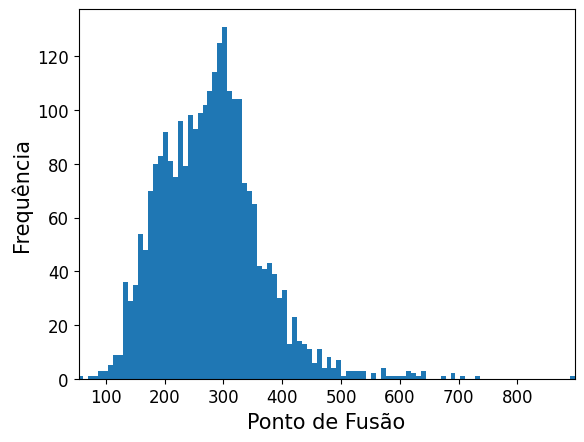

In [4]:
df['Tm'].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)

plt.xlabel("Ponto de Fusão", fontsize=15)
plt.ylabel("Frequência",fontsize=15)
plt.xlim([53.54,897.15])

## Remoção de Outiliers

<Axes: ylabel='Tm'>

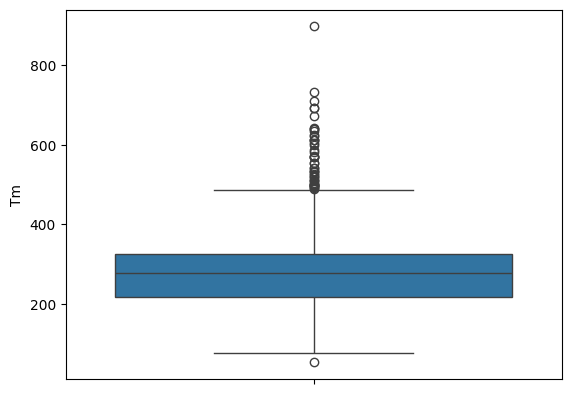

In [5]:
sns.boxplot(y='Tm', data=df)

<Axes: ylabel='Tm'>

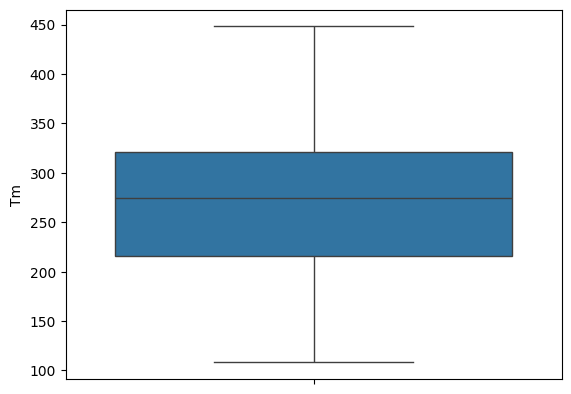

In [6]:
media = df['Tm'].mean()
S = df['Tm'].std()
Z = 2 #Z = (x — media) / S
LS = media + Z * S
LI = media - Z * S
df_wo = df[~((df['Tm'] < LI) | (df['Tm'] > LS))]

sns.boxplot(y='Tm', data=df_wo)

In [7]:
desc = df_wo.describe()
desc.T

,count,mean,std,min,25%,50%,75%,max
id,2569.0,1661.071234,954.928384,1.00,830.00,1657.00,2475.00,3328.00
Tm,2569.0,271.071359,71.313922,108.15,215.65,274.15,320.65,448.15
Group 1,2569.0,1.022188,1.355118,0.00,0.00,1.00,2.00,16.00
Group 2,2569.0,1.503309,3.573234,0.00,0.00,0.00,1.00,42.00
Group 3,2569.0,0.114052,0.410902,0.00,0.00,0.00,0.00,6.00
...,...,...,...,...,...,...,...,...
Group 420,2569.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Group 421,2569.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Group 422,2569.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Group 423,2569.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00


## Remoção de colunas zeradas

In [8]:
rm = []
for col in desc:
    if desc[col]['min'] == desc[col]['max']:
        rm.append(col)

print(rm)
df_without_zeros = df_wo.drop(columns=rm, axis=1)
df_without_zeros

['Group 12', 'Group 28', 'Group 46', 'Group 67', 'Group 73', 'Group 74', 'Group 75', 'Group 84', 'Group 85', 'Group 88', 'Group 90', 'Group 101', 'Group 102', 'Group 104', 'Group 106', 'Group 150', 'Group 152', 'Group 155', 'Group 158', 'Group 160', 'Group 167', 'Group 183', 'Group 194', 'Group 198', 'Group 206', 'Group 207', 'Group 208', 'Group 209', 'Group 212', 'Group 213', 'Group 214', 'Group 215', 'Group 216', 'Group 217', 'Group 218', 'Group 245', 'Group 246', 'Group 247', 'Group 248', 'Group 250', 'Group 252', 'Group 253', 'Group 264', 'Group 280', 'Group 281', 'Group 282', 'Group 285', 'Group 294', 'Group 303', 'Group 306', 'Group 307', 'Group 308', 'Group 309', 'Group 312', 'Group 313', 'Group 316', 'Group 317', 'Group 340', 'Group 342', 'Group 345', 'Group 347', 'Group 348', 'Group 349', 'Group 350', 'Group 352', 'Group 355', 'Group 356', 'Group 357', 'Group 358', 'Group 360', 'Group 363', 'Group 371', 'Group 376', 'Group 377', 'Group 383', 'Group 384', 'Group 385', 'Group 38

,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,Group 406,Group 407,Group 408,Group 409,Group 410,Group 412,Group 414,Group 415,Group 416,Group 418
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,707,ClCCBr,256.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2658,1573,N#CC(Cl)(Cl)Cl,231.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2659,1634,Cc1ccc2c(C)cccc2c1,256.25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2660,3022,CCC(=O)c1ccc2ccccc2c1,333.15,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Remoção SMILES e id

In [9]:
df_wz_ws = df_without_zeros.drop(['id', 'SMILES'], axis=1)
df_wz_ws

,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,...,Group 406,Group 407,Group 408,Group 409,Group 410,Group 412,Group 414,Group 415,Group 416,Group 418
0,213.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,407.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,324.15,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,351.15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,126.15,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,256.45,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2658,231.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2659,256.25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2660,333.15,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Remoção de duplicatas

In [10]:
df_wz_ws = df_wz_ws.drop_duplicates()
df_wz_ws

,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,...,Group 406,Group 407,Group 408,Group 409,Group 410,Group 412,Group 414,Group 415,Group 416,Group 418
0,213.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,407.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,324.15,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,351.15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,126.15,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,256.45,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2658,231.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2659,256.25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2660,333.15,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_wz_ws.to_csv("./melting-point/train_wz_ws.csv", index=False)

## Histograma após essa limpeza

(53.54, 897.15)

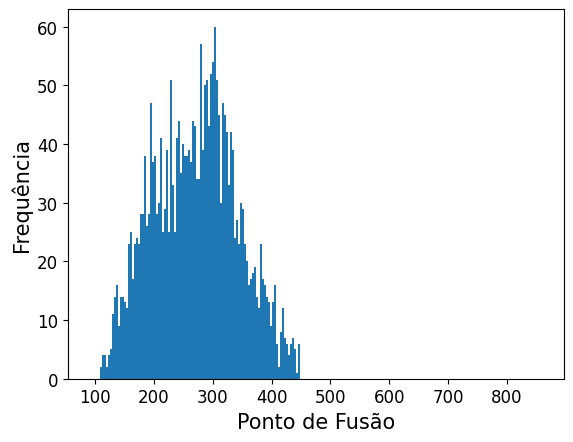

In [12]:
df_wz_ws['Tm'].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)

plt.xlabel("Ponto de Fusão", fontsize=15)
plt.ylabel("Frequência",fontsize=15)
plt.xlim([53.54,897.15])

## Remoção de colunas confusas

In [13]:
df_melted = df_wz_ws.melt(id_vars=["Tm"], var_name="Group")
df_melted

,Tm,Group,value
0,213.15,Group 1,0
1,407.15,Group 1,0
2,324.15,Group 1,2
3,351.15,Group 1,1
4,126.15,Group 1,2
...,...,...,...
856705,256.45,Group 418,0
856706,231.15,Group 418,0
856707,256.25,Group 418,0
856708,333.15,Group 418,0


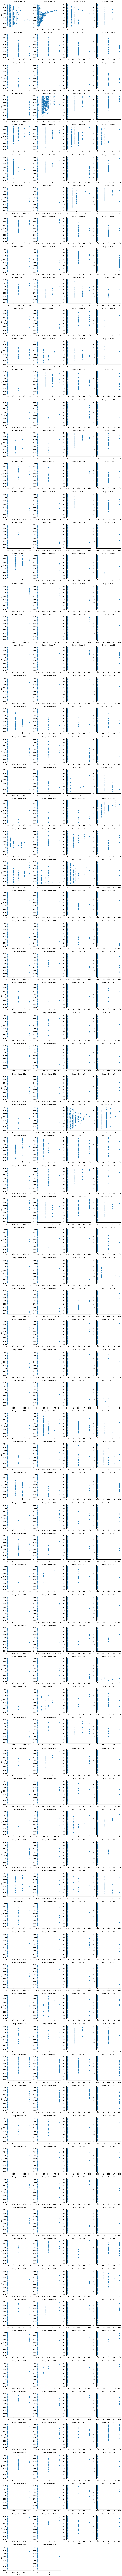

In [14]:
g = sns.FacetGrid(df_melted, col='Group', col_wrap=4, sharex=False, sharey=False)
g.map(sns.scatterplot, 'value', 'Tm')

In [15]:
def remove_confusing_collumns(df, percentile):
    df_groups = df.drop("Tm", axis=1)
    rm = []
    count = 0
    for col in df_groups:
        if df_groups[col].quantile(percentile) == 0.0:
            count += 1
            rm.append(col)

    #print(count)
    #print(rm)
    new_df = df.drop(columns=rm, axis=1)
    return new_df
        

In [16]:
df_wz_ws_wc = remove_confusing_collumns(df_wz_ws, 0.99)
df_wz_ws_wc

,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 13,Group 15,...,Group 326,Group 327,Group 328,Group 331,Group 365,Group 372,Group 374,Group 401,Group 402,Group 403
0,213.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,407.15,0,0,0,0,0,0,0,0,10,...,0,0,0,0,1,0,0,2,0,0
2,324.15,2,1,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,1,0,0
3,351.15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,126.15,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,256.45,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2658,231.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2659,256.25,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,1,1
2660,333.15,1,1,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,1,0,1


In [17]:
df_wz_ws_wc.to_csv("./melting-point/train_reduced.csv", index=False)

## Escalonamento

In [18]:
melting_point={}
melting_point["data"] = df_wz_ws.drop(['Tm'], axis=1).values
melting_point["target"] = df_wz_ws["Tm"].values

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss = StandardScaler()

X = ss.fit_transform(melting_point['data'])
Y = melting_point['target']

In [21]:
df_wz_ws_scaled = pd.DataFrame(data=X)
df_wz_ws_scaled = df_wz_ws_scaled.join(pd.DataFrame(data=Y, columns=['Tm']))
df_wz_ws_scaled.to_csv("./melting-point/train_scaled.csv", index=False)

# Teste sem colunas confusas escalonado

In [22]:
melting_point={}
melting_point["data"] = df_wz_ws_wc.drop(['Tm'], axis=1).values
melting_point["target"] = df_wz_ws_wc["Tm"].values
ss = StandardScaler()
X = ss.fit_transform(melting_point['data'])
Y = melting_point['target']
df_wz_ws_wc_scaled = pd.DataFrame(data=X)
df_wz_ws_wc_scaled = df_wz_ws_wc_scaled.join(pd.DataFrame(data=Y, columns=['Tm']))
df_wz_ws_wc_scaled.to_csv("./melting-point/train_wc_scaled.csv", index=False)

# PCA

In [33]:
org_data = melting_point["data"]
# Subtract mean from data
mean = np.mean(org_data, axis= 0)
print("Média", mean.shape)
mean_data = org_data - mean
print("Dados após subtração da média", org_data.shape, "\n")

Média (334,)
Dados após subtração da média (2565, 334) 



In [34]:
cov = np.cov(mean_data.T)
cov = np.round(cov, 2)
print("Matriz de covariância", cov.shape, "\n")
cov

Matriz de covariância (334, 334) 



array([[ 1.84,  0.8 ,  0.22, ..., -0.  , -0.  , -0.  ],
       [ 0.8 , 12.79,  0.08, ..., -0.  , -0.  , -0.  ],
       [ 0.22,  0.08,  0.17, ..., -0.  , -0.  , -0.  ],
       ...,
       [-0.  , -0.  , -0.  , ...,  0.  , -0.  , -0.  ],
       [-0.  , -0.  , -0.  , ..., -0.  ,  0.  , -0.  ],
       [-0.  , -0.  , -0.  , ..., -0.  , -0.  ,  0.  ]], shape=(334, 334))

In [35]:
eig_val, eig_vec = np.linalg.eig(cov)
print("Autovetores", eig_vec.shape)
print("Autovalores", eig_val.shape, "\n")

Autovetores (334, 334)
Autovalores (334,) 



In [36]:
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]
print("Autovetores ordenados", eig_vec.shape)
print("Autovalores ordenados", eig_val.shape, "\n")

Autovetores ordenados (334, 334)
Autovalores ordenados (334,) 



/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


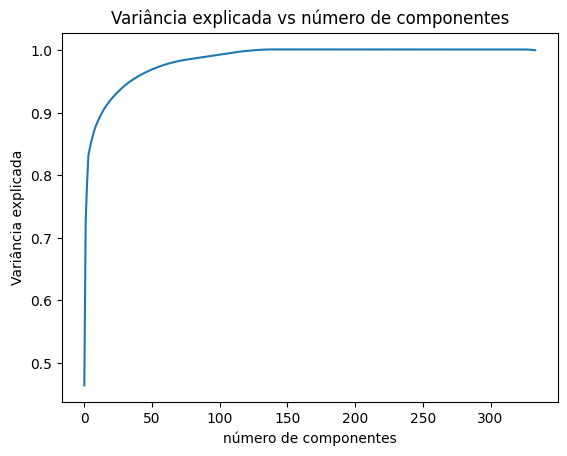

(334, 125)


In [37]:
# Get explained variance
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val/ sum_eig_val
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.plot(np.arange(0, len(explained_variance), 1), cumulative_variance)
plt.title("Variância explicada vs número de componentes")
plt.xlabel("número de componentes")
plt.ylabel("Variância explicada")
plt.show()

## We will 125 components
n_comp = 125
eig_vec = eig_vec[:,:n_comp]
print(eig_vec.shape)

In [38]:
pca_data = mean_data.dot(eig_vec)
print("Dados transformados", pca_data.shape)

Dados transformados (2565, 125)


/home/codespace/.local/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


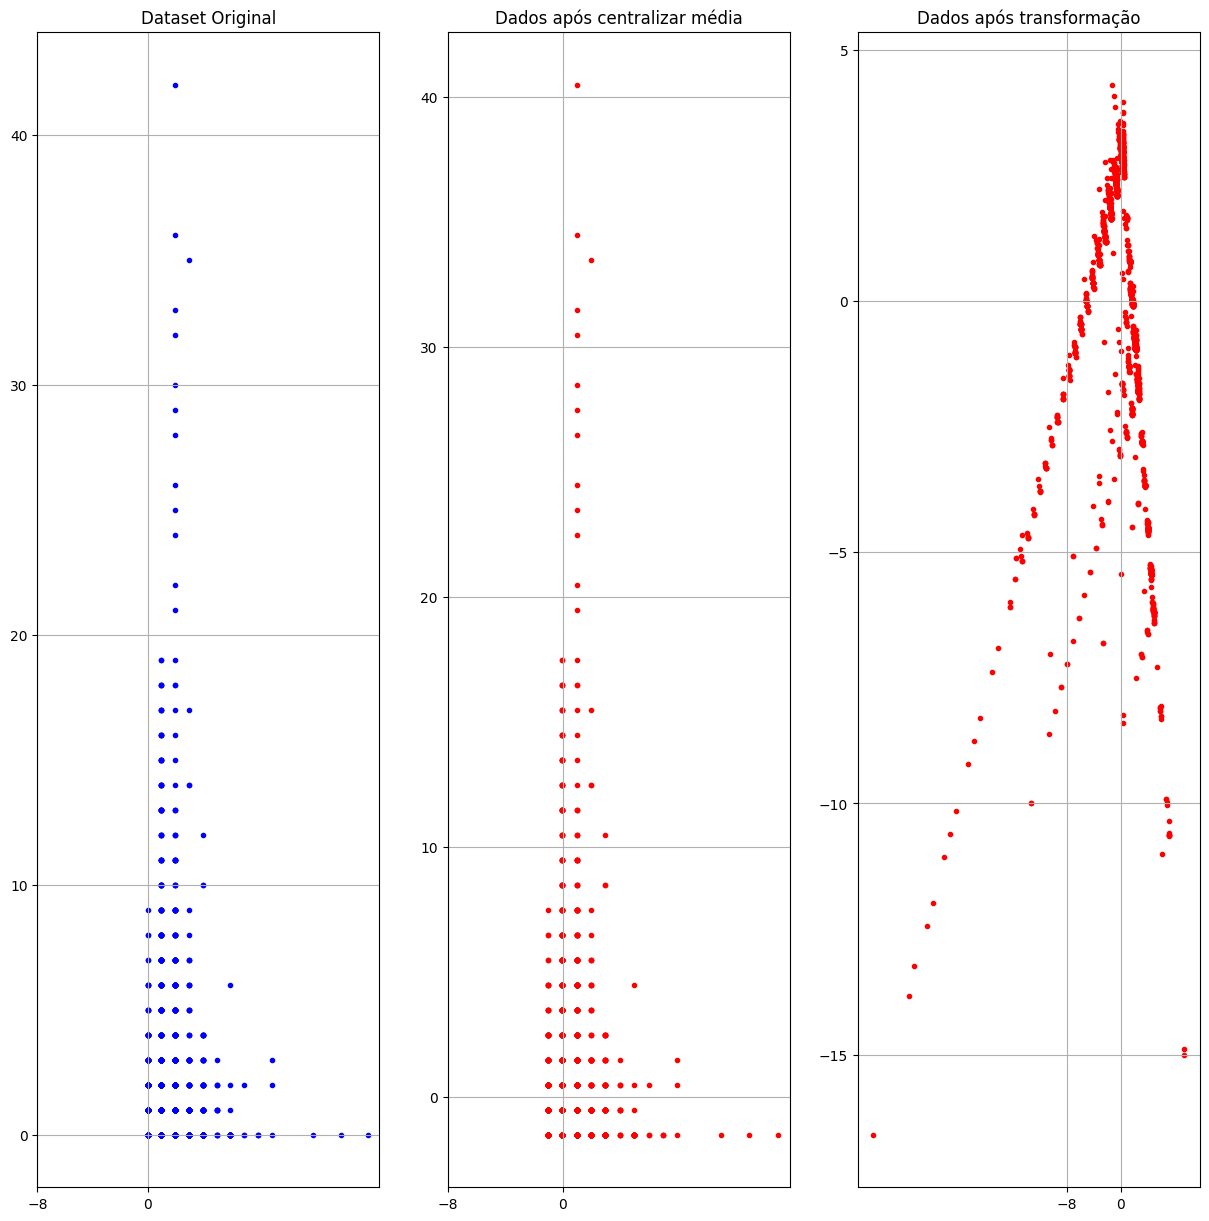

In [39]:
# Plot data

fig, ax = plt.subplots(1,3, figsize= (15,15))
# Plot original data
ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')

# Plot data after subtracting mean from data
ax[1].scatter(mean_data[:,0], mean_data[:,1], color='red', marker='.')

# Plot data after subtracting mean from data
ax[2].scatter(pca_data[:,0], pca_data[:,1], color='red', marker='.')

# Set title
ax[0].set_title("Dataset Original")
ax[1].set_title("Dados após centralizar média")
ax[2].set_title("Dados após transformação")

# Set x ticks
ax[0].set_xticks(np.arange(-8, 1, 8))
ax[1].set_xticks(np.arange(-8, 1, 8))
ax[2].set_xticks(np.arange(-8, 1, 8))

# Set grid to 'on'
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')

major_axis = eig_vec[:,0].flatten()
xmin = np.amin(pca_data[:,0])
xmax = np.amax(pca_data[:,0])
ymin = np.amin(pca_data[:,1])
ymax = np.amax(pca_data[:,1])

plt.show()
plt.close('all')

In [40]:
df_pca = pd.DataFrame(data=pca_data)
df_pca.to_csv("./melting-point/train_pca.csv", index=False)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,0.395568+0.000000j,2.570610+0.000000j,-0.805120+0.000000j,1.191179+0.000000j,-0.289556+0.000000j,0.087608+0.000000j,0.174233+0.000000j,0.272482+0.000000j,0.179328+0.000000j,0.181130+0.000000j,...,0.151921+0.000000j,-0.213801+0.000000j,0.265542+0.000000j,-0.139535+0.000000j,0.028111+0.000000j,0.007776+0.000000j,-0.292802+0.000000j,-0.039339+0.000000j,-0.006441+0.000000j,-0.117356+0.000000j
1,5.028025+0.000000j,-6.364983+0.000000j,-0.078740+0.000000j,-0.499328+0.000000j,-0.587902+0.000000j,2.573903+0.000000j,0.166445+0.000000j,0.005937+0.000000j,0.381672+0.000000j,-3.586607+0.000000j,...,-0.161455+0.000000j,-0.027393+0.000000j,0.064327+0.000000j,0.027056+0.000000j,0.039089+0.000000j,-0.028091+0.000000j,0.144284+0.000000j,-0.039169+0.000000j,0.128606+0.000000j,0.248078+0.000000j
2,1.138426+0.000000j,-1.216556+0.000000j,1.073173+0.000000j,-0.549345+0.000000j,-0.307958+0.000000j,0.472600+0.000000j,0.212285+0.000000j,-0.015768+0.000000j,0.440652+0.000000j,-2.015876+0.000000j,...,0.422101+0.000000j,0.018720+0.000000j,0.038064+0.000000j,0.044053+0.000000j,-0.111236+0.000000j,0.061330+0.000000j,0.059480+0.000000j,-0.068339+0.000000j,0.086320+0.000000j,0.253438+0.000000j
3,0.283736+0.000000j,2.665744+0.000000j,0.049260+0.000000j,0.662972+0.000000j,-0.153669+0.000000j,0.060813+0.000000j,0.097847+0.000000j,0.142704+0.000000j,0.285048+0.000000j,0.090797+0.000000j,...,-0.022969+0.000000j,0.031831+0.000000j,-0.027581+0.000000j,-0.028799+0.000000j,0.068004+0.000000j,-0.008303+0.000000j,-0.007252+0.000000j,0.008409+0.000000j,-0.009329+0.000000j,-0.008099+0.000000j
4,-2.469750+0.000000j,1.383731+0.000000j,0.713172+0.000000j,0.124753+0.000000j,-0.036919+0.000000j,0.028940+0.000000j,0.036890+0.000000j,-0.014116+0.000000j,0.311885+0.000000j,0.050223+0.000000j,...,0.003785+0.000000j,-0.021154+0.000000j,0.005877+0.000000j,-0.002470+0.000000j,-0.033612+0.000000j,0.007284+0.000000j,-0.009793+0.000000j,0.001877+0.000000j,0.011931+0.000000j,-0.004374+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,-0.502841+0.000000j,2.104471+0.000000j,-0.853628+0.000000j,1.172941+0.000000j,-0.199934+0.000000j,0.070355+0.000000j,0.198786+0.000000j,0.278777+0.000000j,0.187700+0.000000j,0.073560+0.000000j,...,0.003311+0.000000j,0.009052+0.000000j,-0.007952+0.000000j,0.000063+0.000000j,-0.000416+0.000000j,-0.007953+0.000000j,-0.005183+0.000000j,-0.015779+0.000000j,0.003200+0.000000j,0.008410+0.000000j
2561,0.401367+0.000000j,2.604668+0.000000j,-0.859701+0.000000j,1.332806+0.000000j,-0.859379+0.000000j,0.046153+0.000000j,0.774833+0.000000j,-2.147939+0.000000j,-0.847785+0.000000j,0.005693+0.000000j,...,0.072602+0.000000j,0.012701+0.000000j,0.056913+0.000000j,-0.019118+0.000000j,0.065281+0.000000j,0.059917+0.000000j,0.073490+0.000000j,-0.035563+0.000000j,0.041425+0.000000j,0.001826+0.000000j
2562,3.205871+0.000000j,-2.807073+0.000000j,-0.371523+0.000000j,0.372712+0.000000j,1.778355+0.000000j,1.537328+0.000000j,-0.097086+0.000000j,-0.343230+0.000000j,-0.227114+0.000000j,0.361688+0.000000j,...,-0.088040+0.000000j,-0.026735+0.000000j,0.046008+0.000000j,-0.005015+0.000000j,0.007783+0.000000j,-0.064075+0.000000j,0.004498+0.000000j,-0.040647+0.000000j,0.030392+0.000000j,-0.041869+0.000000j
2563,2.630635+0.000000j,-4.026666+0.000000j,0.532268+0.000000j,-0.441791+0.000000j,-0.096388+0.000000j,1.845041+0.000000j,-0.227849+0.000000j,-0.141472+0.000000j,0.119562+0.000000j,0.271951+0.000000j,...,0.075989+0.000000j,0.014891+0.000000j,-0.036368+0.000000j,0.025494+0.000000j,-0.064161+0.000000j,0.009948+0.000000j,-0.008847+0.000000j,-0.037677+0.000000j,0.008013+0.000000j,-0.014863+0.000000j


In [41]:
df_eig_vec = pd.DataFrame(data=eig_vec)
df_eig_vec.to_csv("./melting-point/train_eig_vec.csv", index=False)
df_eig_vec

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,-0.101905+0.000000j,0.108320+0.000000j,0.830627+0.000000j,-0.481490+0.000000j,0.049854+0.000000j,-0.008624+0.000000j,-0.039026+0.000000j,-0.097110+0.000000j,0.073063+0.000000j,-0.013538+0.000000j,...,-0.001197+0.000000j,-0.019830+0.000000j,-0.003215+0.000000j,-0.000579+0.000000j,-0.010590+0.000000j,0.002266+0.000000j,-0.025163+0.000000j,0.005036+0.000000j,0.009441+0.000000j,0.006830+0.000000j
1,-0.884584+0.000000j,-0.460945+0.000000j,-0.058046+0.000000j,-0.015355+0.000000j,0.013257+0.000000j,-0.003473+0.000000j,-0.008150+0.000000j,-0.014839+0.000000j,-0.011438+0.000000j,-0.006201+0.000000j,...,-0.001477+0.000000j,0.000212+0.000000j,-0.001280+0.000000j,0.001057+0.000000j,-0.002367+0.000000j,-0.000138+0.000000j,0.000846+0.000000j,-0.000010+0.000000j,-0.000836+0.000000j,0.000307+0.000000j
2,-0.014261+0.000000j,0.024040+0.000000j,0.110381+0.000000j,-0.043360+0.000000j,-0.021268+0.000000j,0.058804+0.000000j,0.003285+0.000000j,0.283316+0.000000j,-0.716434+0.000000j,-0.038516+0.000000j,...,0.005503+0.000000j,0.025312+0.000000j,0.002905+0.000000j,0.005100+0.000000j,0.029851+0.000000j,0.014669+0.000000j,0.012748+0.000000j,0.047253+0.000000j,-0.011618+0.000000j,-0.018128+0.000000j
3,-0.002750+0.000000j,0.010757+0.000000j,0.051511+0.000000j,-0.025611+0.000000j,-0.011034+0.000000j,0.015080+0.000000j,-0.022648+0.000000j,-0.019600+0.000000j,0.014072+0.000000j,-0.005806+0.000000j,...,0.012407+0.000000j,0.060245+0.000000j,-0.003286+0.000000j,0.002994+0.000000j,0.080483+0.000000j,0.063676+0.000000j,0.035672+0.000000j,0.253709+0.000000j,-0.036614+0.000000j,-0.132187+0.000000j
4,-0.003991+0.000000j,0.005520+0.000000j,-0.010178+0.000000j,0.020425+0.000000j,-0.031616+0.000000j,0.012886+0.000000j,-0.000868+0.000000j,0.019526+0.000000j,0.014731+0.000000j,0.006746+0.000000j,...,0.000215+0.000000j,-0.017386+0.000000j,0.019144+0.000000j,0.012501+0.000000j,-0.089648+0.000000j,0.068574+0.000000j,0.025630+0.000000j,0.035909+0.000000j,-0.021384+0.000000j,0.044937+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0.001946+0.000000j,-0.003947+0.000000j,0.001929+0.000000j,-0.004472+0.000000j,0.001272+0.000000j,0.060890+0.000000j,-0.013085+0.000000j,-0.008891+0.000000j,-0.002261+0.000000j,0.013654+0.000000j,...,-0.428367+0.000000j,-0.139070+0.000000j,0.143025+0.000000j,-0.086674+0.000000j,0.059484+0.000000j,-0.152365+0.000000j,0.071919+0.000000j,-0.075087+0.000000j,0.048067+0.000000j,-0.076568+0.000000j
330,0.001697+0.000000j,-0.002975+0.000000j,-0.003027+0.000000j,0.000237+0.000000j,0.002884+0.000000j,0.056575+0.000000j,-0.011576+0.000000j,-0.001186+0.000000j,-0.008375+0.000000j,0.033947+0.000000j,...,0.276378+0.000000j,0.013819+0.000000j,-0.105313+0.000000j,-0.042676+0.000000j,0.106147+0.000000j,-0.037598+0.000000j,-0.098076+0.000000j,0.054457+0.000000j,0.082743+0.000000j,0.477593+0.000000j
331,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
332,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
